In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data_2 = pd.read_csv('/content/drive/MyDrive/dsl-clustering project/6th_merged_data.csv')

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                2500 non-null   object 
 1   종목코드               2500 non-null   float64
 2   업종                 2500 non-null   object 
 3   상장일                2500 non-null   object 
 4   지역                 2500 non-null   object 
 5   영문 종목명             2500 non-null   object 
 6   시장구분               2500 non-null   object 
 7   상장주식수              2500 non-null   float64
 8   ESG등급              955 non-null    object 
 9   환경                 955 non-null    object 
 10  사회                 955 non-null    object 
 11  지배구조               955 non-null    object 
 12  등락률                2380 non-null   float64
 13  거래량_x              2380 non-null   float64
 14  거래대금_x             2380 non-null   float64
 15  온실가스 배출량(tCO2-eq)  326 non-null    float64
 16  에너지 사용량(TJ)        326 n

In [ ]:
data_2.head(3)

,회사명,종목코드,업종,상장일,지역,영문 종목명,시장구분,상장주식수,ESG등급,환경,...,직무향상교육,리더십교육,해외연수지원,도서비지원,외국어교육지원,자격증취득지원,총개수,기준가&종가 평균,업종 대분류,온실가스/매출액
0,모아데이타,288980.0,소프트웨어 개발 및 공급업,2022-03-10,경기도,"Moadata Co., Ltd",KOSDAQ,5361.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,정보 통신 소프트웨어 및 공학연구,NaN
1,에스케이증권7호스팩,408920.0,금융 지원 서비스업,2022-03-07,서울특별시,SK Securities ACPC No.7 Special Purpose Acquis...,KOSDAQ,3620.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,금융,NaN
2,노을,376930.0,의료용 기기 제조업,2022-03-03,경기도,"Noul Co., Ltd.",KOSDAQ,10425.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,의료기기 의약품 제조업,NaN


## 업종평균으로 결측치 처리

In [ ]:
data_2['온실가스 배출량(tCO2-eq)'] = data_2['온실가스 배출량(tCO2-eq)'].fillna(data_2.groupby('업종')['온실가스 배출량(tCO2-eq)'].transform('mean'))
data_2['에너지 사용량(TJ)'] = data_2['에너지 사용량(TJ)'].fillna(data_2.groupby('업종')['에너지 사용량(TJ)'].transform('mean'))
data_2['자산총계'] = data_2['자산총계'].fillna(data_2.groupby('업종')['자산총계'].transform('mean'))
data_2['총개수'] = data_2['총개수'].fillna(data_2.groupby('업종')['총개수'].transform('mean'))
data_2['자본총계'] = data_2['자본총계'].fillna(data_2.groupby('업종')['자본총계'].transform('mean'))
data_2['자본금'] = data_2['자본금'].fillna(data_2.groupby('업종')['자본금'].transform('mean'))
data_2['매출액'] = data_2['매출액'].fillna(data_2.groupby('업종')['매출액'].transform('mean'))
data_2['영업이익'] = data_2['영업이익'].fillna(data_2.groupby('업종')['영업이익'].transform('mean'))
data_2['순이익'] = data_2['순이익'].fillna(data_2.groupby('업종')['순이익'].transform('mean'))
data_2['시가총액'] = data_2['시가총액'].fillna(data_2.groupby('업종')['시가총액'].transform('mean'))
data_2['온실가스/매출액'] = data_2['온실가스/매출액'].fillna(data_2.groupby('업종')['온실가스/매출액'].transform('mean'))
data_2['기준가&종가 평균'] = data_2['기준가&종가 평균'].fillna(data_2.groupby('업종')['기준가&종가 평균'].transform('mean'))

## 남은 결측치 업종 대분류 평균으로 처리

In [ ]:
data_2['온실가스 배출량(tCO2-eq)'] = data_2['온실가스 배출량(tCO2-eq)'].fillna(data_2.groupby('업종 대분류')['온실가스 배출량(tCO2-eq)'].transform('mean'))
data_2['에너지 사용량(TJ)'] = data_2['에너지 사용량(TJ)'].fillna(data_2.groupby('업종 대분류')['에너지 사용량(TJ)'].transform('mean'))
data_2['자산총계'] = data_2['자산총계'].fillna(data_2.groupby('업종 대분류')['자산총계'].transform('mean'))
data_2['총개수'] = data_2['총개수'].fillna(data_2.groupby('업종 대분류')['총개수'].transform('mean'))
data_2['자본총계'] = data_2['자본총계'].fillna(data_2.groupby('업종 대분류')['자본총계'].transform('mean'))
data_2['자본금'] = data_2['자본금'].fillna(data_2.groupby('업종 대분류')['자본금'].transform('mean'))
data_2['매출액'] = data_2['매출액'].fillna(data_2.groupby('업종 대분류')['매출액'].transform('mean'))
data_2['영업이익'] = data_2['영업이익'].fillna(data_2.groupby('업종 대분류')['영업이익'].transform('mean'))
data_2['순이익'] = data_2['순이익'].fillna(data_2.groupby('업종 대분류')['순이익'].transform('mean'))
data_2['시가총액'] = data_2['시가총액'].fillna(data_2.groupby('업종 대분류')['시가총액'].transform('mean'))
data_2['온실가스/매출액'] = data_2['온실가스/매출액'].fillna(data_2.groupby('업종 대분류')['온실가스/매출액'].transform('mean'))
data_2['기준가&종가 평균'] = data_2['기준가&종가 평균'].fillna(data_2.groupby('업종 대분류')['기준가&종가 평균'].transform('mean'))

In [ ]:
data_2.head()

,회사명,종목코드,업종,상장일,지역,영문 종목명,시장구분,상장주식수,ESG등급,환경,...,직무향상교육,리더십교육,해외연수지원,도서비지원,외국어교육지원,자격증취득지원,총개수,기준가&종가 평균,업종 대분류,온실가스/매출액
0,모아데이타,288980.0,소프트웨어 개발 및 공급업,2022-03-10,경기도,"Moadata Co., Ltd",KOSDAQ,5361.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,22814.894737,정보 통신 소프트웨어 및 공학연구,0.000750
1,에스케이증권7호스팩,408920.0,금융 지원 서비스업,2022-03-07,서울특별시,SK Securities ACPC No.7 Special Purpose Acquis...,KOSDAQ,3620.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.375,8831.769231,금융,0.000000
2,노을,376930.0,의료용 기기 제조업,2022-03-03,경기도,"Noul Co., Ltd.",KOSDAQ,10425.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.875,15071.970000,의료기기 의약품 제조업,0.000000
3,비씨엔씨,146320.0,반도체 제조업,2022-03-03,경기도,"BCnC Co., Ltd.",KOSDAQ,12368.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,12829.385965,전자부품 및 반도체 제조,0.059287
4,풍원정밀,371950.0,전자부품 제조업,2022-02-28,경기도,"POONGWON PRECISION Co.,Ltd.",KOSDAQ,21040.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,4.000,17223.224000,전자부품 및 반도체 제조,0.045589


In [ ]:
float_columns = data_2.select_dtypes("float64").columns
float_df = data_2[float_columns]

object_columns = data_2.select_dtypes("object").columns
object_df = data_2[object_columns]
object_df = object_df.fillna('N')

In [ ]:
data_3 = pd.concat([object_df, float_df], axis = 1)

In [ ]:
data_3.columns

Index(['회사명', '업종', '상장일', '지역', '영문 종목명', '시장구분', 'ESG등급', '환경', '사회', '지배구조',
       'stock_name', 'corp_cls', '업종 대분류', '종목코드', '상장주식수', '등락률', '거래량_x',
       '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)', 'corp_code',
       'induty_code', 'est_dt', '2021년 NCSI', '자산총계', '자본금', '자본총계', '매출액',
       '영업이익', '순이익', '종가', '시가총액', '거래량_y', '거래대금_y', '통근버스운행', '본인학자금',
       '복지카드', '업무활동비', '자격증수당', '위험수당', '사대보험', '워크샵', '신입사원교육', '직무향상교육',
       '리더십교육', '해외연수지원', '도서비지원', '외국어교육지원', '자격증취득지원', '총개수', '기준가&종가 평균',
       '온실가스/매출액'],
      dtype='object')

In [ ]:
data_4 = data_3[data_3['ESG등급'] != 'N']
data_4.reset_index(inplace=True)
data_4 = data_4[[ '회사명', '업종', '상장일', '지역', '시장구분', 'ESG등급', '환경', '사회', '지배구조',
       '종목코드', '상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)',
       '에너지 사용량(TJ)', '2021년 NCSI', '자산총계', '자본금', '자본총계', '매출액', '영업이익',
       '순이익', '종가', '시가총액', '거래량_y', '거래대금_y', '기준가&종가 평균', '온실가스/매출액',
       '총개수']]

In [ ]:
data_4['상장일']

0      2021-08-09
1      2021-07-06
2      2019-12-19
3      2019-11-29
4      2019-11-25
          ...    
950    1956-07-02
951    1956-07-02
952    1956-03-03
953    1956-03-03
954    1956-03-03
Name: 상장일, Length: 955, dtype: object

In [ ]:
from datetime import datetime
date_diff_list = [] 

for i in range(len(data_4['상장일'])):
  now  = datetime.now()
  now = datetime.strptime(str(now)[0:10], "%Y-%m-%d")
  date_to_compare = datetime.strptime(str(data_4['상장일'][i])[0:10], "%Y-%m-%d")
  date_diff = now - date_to_compare
  date_diff = str(date_diff)[:-14]
  date_diff_list.append(date_diff)

In [ ]:
date_diff_df = pd.DataFrame(date_diff_list)
date_diff_df.columns = ['상장기간']
data_4 = pd.concat([data_4, date_diff_df], axis = 1)

In [ ]:
data_4.head(1)

,회사명,업종,상장일,지역,시장구분,ESG등급,환경,사회,지배구조,종목코드,...,영업이익,순이익,종가,시가총액,거래량_y,거래대금_y,기준가&종가 평균,온실가스/매출액,총개수,상장기간
0,PI첨단소재,플라스틱제품 제조업,2021-08-09,충청북도,KOSPI,B+,B+,B,B+,178920.0,...,75858.0,64000.0,54800.0,1.610000e+12,190764.0,1.043613e+10,42200.0,0.285074,1.0,239


# 카테고리 문자열 데이터 수치화 (인코딩 방법) 

## 레이블 인코딩 사용 

https://lovelydiary.tistory.com/419

In [ ]:
'''
kp = KPrototypes(n_clusters=6, init='cao', n_init=1, verbose=True)
kp.fit_predict(data_5, categorical=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
data_4 = data_4[['회사명', '업종', '지역', '시장구분', 'ESG등급', '환경', '사회', '지배구조', '종목코드',
       '상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
        '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액',
       '거래량_y', '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '총개수', '상장기간']]
'''

"\nkp = KPrototypes(n_clusters=6, init='cao', n_init=1, verbose=True)\nkp.fit_predict(data_5, categorical=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])\ndata_4 = data_4[['회사명', '업종', '지역', '시장구분', 'ESG등급', '환경', '사회', '지배구조', '종목코드',\n       '상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',\n        '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액',\n       '거래량_y', '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '총개수', '상장기간']]\n"

In [ ]:
data_4_object = data_4[['회사명', '업종', '지역', '시장구분', 'ESG등급', '환경', '사회', '지배구조']]

In [ ]:
data_4_float = data_4[['상장주식수', '등락률', '거래량_x', '거래대금_x',
       '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)', '자산총계', '자본금', '자본총계',
       '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y', '거래대금_y', '기준가&종가 평균',
       '온실가스/매출액','상장기간']]

In [ ]:
# 라벨 인코딩 - 
from sklearn.preprocessing import LabelEncoder
LEdf = pd.DataFrame()
for col in data_4_object.columns:
  le = LabelEncoder()
  le.fit(data_4_object[col])
  LEdf[col] = le.transform(data_4_object[col])

In [ ]:
data_4_object2 = LEdf
data_4_object2

,회사명,업종,지역,시장구분,ESG등급,환경,사회,지배구조
0,94,126,16,1,3,3,2,3
1,554,79,8,1,4,4,2,2
2,321,100,8,0,4,5,4,3
3,719,67,8,0,2,5,4,3
4,452,97,10,1,2,5,2,3
...,...,...,...,...,...,...,...,...
950,10,46,8,1,0,0,1,0
951,326,53,8,1,2,5,3,3
952,141,111,8,1,4,4,4,3
953,605,132,8,1,3,5,2,0


In [ ]:
data_4_object

,회사명,업종,지역,시장구분,ESG등급,환경,사회,지배구조
0,PI첨단소재,플라스틱제품 제조업,충청북도,KOSPI,B+,B+,B,B+
1,엠씨넥스,영상 및 음향기기 제조업,서울특별시,KOSPI,C,C,B,B
2,메드팩토,자연과학 및 공학 연구개발업,서울특별시,KOSDAQ,C,D,C,B+
3,코리아센터,소프트웨어 개발 및 공급업,서울특별시,KOSDAQ,B,D,C,B+
4,센트랄모텍,자동차 신품 부품 제조업,울산광역시,KOSPI,B,D,B,B+
...,...,...,...,...,...,...,...,...
950,CJ대한통운,도로 화물 운송업,서울특별시,KOSPI,A,A,A+,A
951,메리츠화재,보험업,서울특별시,KOSPI,B,D,B+,B+
952,경방,종합 소매업,서울특별시,KOSPI,C,C,C,B+
953,유수홀딩스,회사 본부 및 경영 컨설팅 서비스업,서울특별시,KOSPI,B+,D,B,A


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_4_float_std  = scaler.fit_transform(data_4_float)

# 시각화 위해 데이터프레임으로 변환
data_4_float = pd.DataFrame(data_4_float_std, columns=data_4_float.columns, index=list(data_4_float.index.values))

In [ ]:
data_4_float.head()

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,영업이익,순이익,종가,시가총액,거래량_y,거래대금_y,기준가&종가 평균,온실가스/매출액,상장기간
0,0.004819,0.190183,0.003631,0.010860,0.001123,0.003644,0.001170,0.003109,0.001530,0.001511,0.053725,0.059181,0.049374,0.003360,0.005959,0.009753,0.034683,0.026214,0.000000
1,0.002911,0.129244,0.003134,0.009055,0.015149,0.022494,0.001227,0.001797,0.001526,0.004093,0.052008,0.058045,0.051458,0.002123,0.009762,0.016548,0.038411,0.000000,0.001423
2,0.003397,0.055074,0.003400,0.012056,0.001341,0.005449,0.000247,0.002090,0.000069,0.000000,0.050605,0.056714,0.053451,0.002529,0.008073,0.013962,0.047626,0.000000,0.025063
3,0.012665,0.111985,0.012575,0.006055,0.000294,0.001199,0.000653,0.001460,0.000920,0.000390,0.051683,0.057421,0.005866,0.001030,0.004480,0.000905,0.005735,0.000000,0.025900
4,0.001342,0.089947,0.003003,0.004951,0.000551,0.002109,0.015776,0.024129,0.020835,0.025570,0.057847,0.063320,0.020290,0.000343,0.001007,0.000680,0.019171,0.001807,0.026067


ESG 라벨링 기준
- A  = 0 
- A+ = 1
- B  = 2 
- B+ = 3
- C  = 4 
- D  = 5

In [ ]:
data_4 = pd.concat([data_4_float, data_4_object2], axis = 1)
data_4.head(2)

,상장주식수,등락률,거래량_x,거래대금_x,온실가스 배출량(tCO2-eq),에너지 사용량(TJ),자산총계,자본금,자본총계,매출액,...,온실가스/매출액,상장기간,회사명,업종,지역,시장구분,ESG등급,환경,사회,지배구조
0,0.004819,0.190183,0.003631,0.010860,0.001123,0.003644,0.001170,0.003109,0.001530,0.001511,...,0.026214,0.000000,94,126,16,1,3,3,2,3
1,0.002911,0.129244,0.003134,0.009055,0.015149,0.022494,0.001227,0.001797,0.001526,0.004093,...,0.000000,0.001423,554,79,8,1,4,4,2,2


In [ ]:
data_4.to_csv('/전처리완료_merged_6.csv')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache-fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (4,314 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and d

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

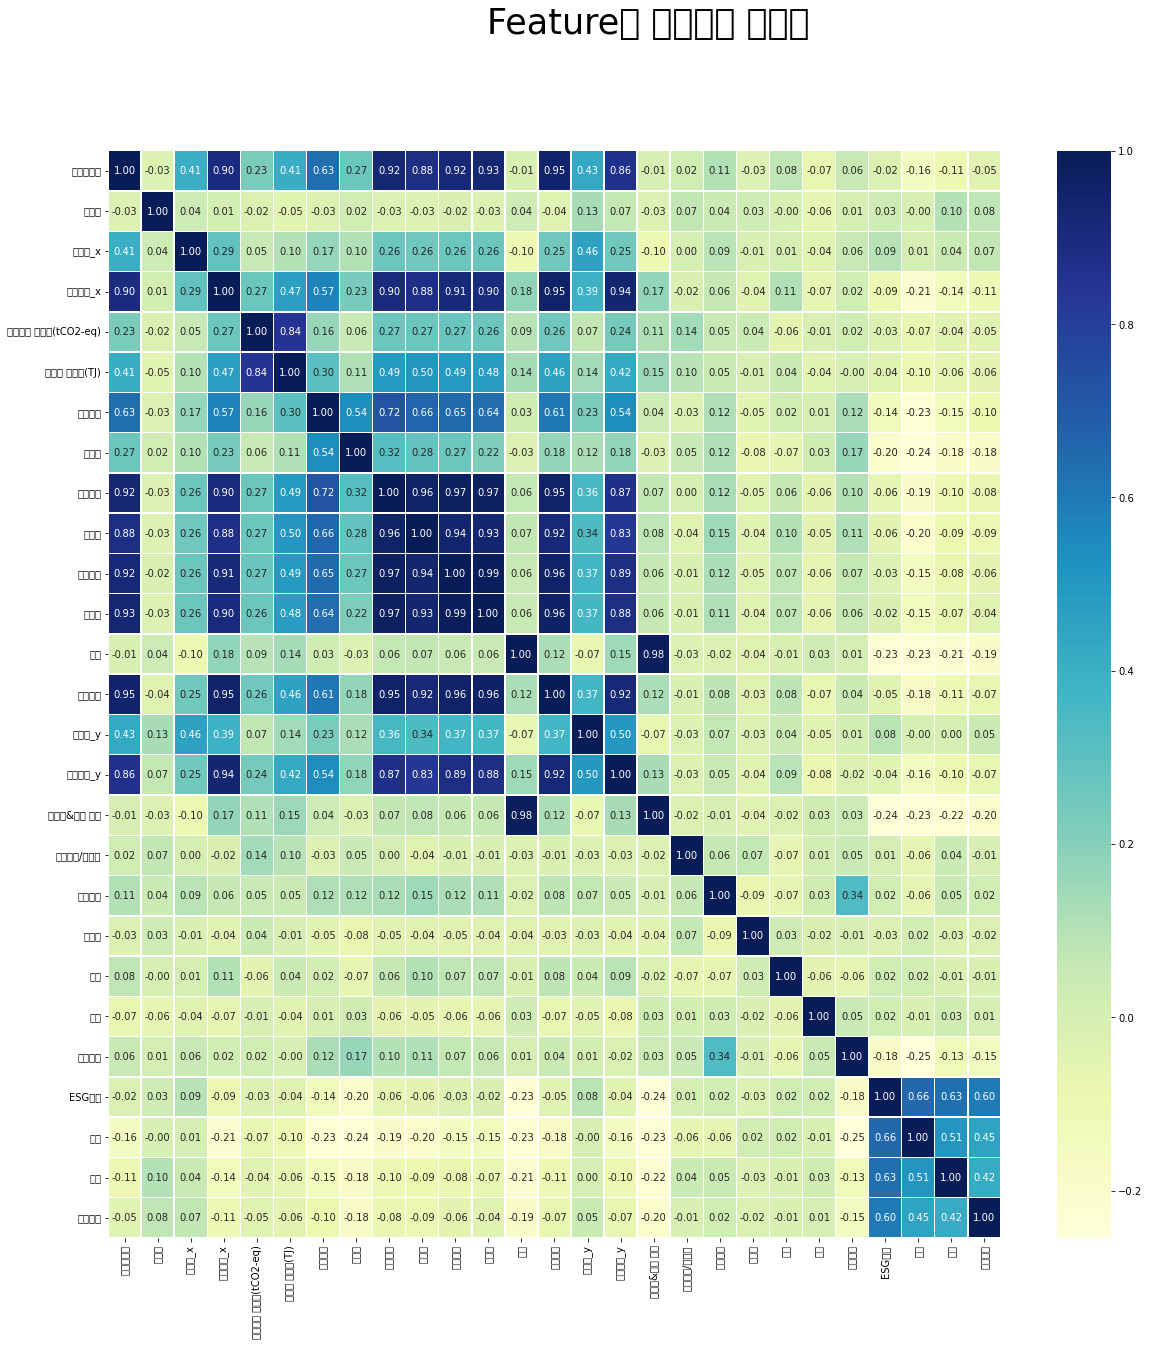

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns    

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,20))
plt.suptitle('Feature별 상관관계 그래프', size = 35, ha = 'center')
sns.heatmap(data = data_4.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='YlGnBu')

# 오버샘플링

https://blog.naver.com/PostView.naver?blogId=gh03014&logNo=222309000768&parentCategoryNo=&categoryNo=8&viewDate=&isShowPopularPosts=true&from=search

https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html 
- 여러가지 imblanced 데이터 문제 해결 방법 소개
- 현재 문제: 카테고리 데이터 오버샘플링 불가

In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
oversampling_instance = SMOTE(k_neighbors = 3)

In [ ]:
data_4 = data_4.fillna(0)
data_4_X = data_4[['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '회사명', '업종', '지역', '시장구분', '환경', '사회', '지배구조']]
data_4_y = data_4[[ 'ESG등급']]      

In [ ]:
data_4_y.value_counts()

ESG등급
4        301
2        276
0        182
3        158
5         21
1         17
dtype: int64

In [ ]:
# data_4_X.info()

In [ ]:
o_X, o_y = oversampling_instance.fit_resample(data_4_X, data_4_y)

In [ ]:
o_y.value_counts()

ESG등급
0        301
1        301
2        301
3        301
4        301
5        301
dtype: int64

In [ ]:
pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes
kp = KPrototypes(n_clusters=6, init='cao', n_init=1, verbose=True)
kp.fit_predict(o_X, categorical=[19,20,21,22,23,24,25])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 560, ncost: 586.318133932896
Run: 1, iteration: 2/100, moves: 281, ncost: 579.1054146418415
Run: 1, iteration: 3/100, moves: 63, ncost: 578.8111914129631
Run: 1, iteration: 4/100, moves: 12, ncost: 578.7964534828471
Run: 1, iteration: 5/100, moves: 5, ncost: 578.7929629868161
Run: 1, iteration: 6/100, moves: 0, ncost: 578.7929629868161


array([2, 2, 4, ..., 4, 4, 4], dtype=uint16)

In [ ]:
o_y.columns

Index(['ESG등급'], dtype='object')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
np_arr = np.concatenate((o_X, o_y, kp.labels_.reshape(-1,1)),axis=1)
df = pd.DataFrame(np_arr , columns = ['상장주식수', '등락률', '거래량_x', '거래대금_x', '온실가스 배출량(tCO2-eq)', '에너지 사용량(TJ)',
       '자산총계', '자본금', '자본총계', '매출액', '영업이익', '순이익', '종가', '시가총액', '거래량_y',
       '거래대금_y', '기준가&종가 평균', '온실가스/매출액', '상장기간', '회사명', '업종', '지역', '시장구분',
       '환경', '사회', '지배구조','ESG등급',"cluster"])
df[['ESG등급', '환경', '사회', '지배구조',"cluster"]] = df[['ESG등급', '환경', '사회', '지배구조',"cluster"]].astype(object)
px.scatter(df , x="매출액",y="자산총계",color="ESG등급",symbol="cluster",width=700,height=700)

In [ ]:
df.groupby('cluster')['ESG등급'].agg(**{
    'cluster별 최빈값':lambda x:x.mode(),
    'cluster별 데이터 수':lambda x:x.count()
}).reset_index()

,cluster,cluster별 최빈값,cluster별 데이터 수
0,0.0,4.0,352
1,1.0,1.0,379
2,2.0,3.0,394
3,3.0,1.0,105
4,4.0,5.0,379
5,5.0,3.0,197


In [ ]:
cluster_0 = df[df['cluster'] == 0.0]
cluster_1 = df[df['cluster'] == 1.0]
cluster_2 = df[df['cluster'] == 2.0]
cluster_3 = df[df['cluster'] == 3.0]
cluster_4 = df[df['cluster'] == 4.0]
cluster_5 = df[df['cluster'] == 5.0]

In [ ]:
print(cluster_0['ESG등급'].value_counts(normalize=True))
print(cluster_1['ESG등급'].value_counts(normalize=True))
print(cluster_2['ESG등급'].value_counts(normalize=True))
print(cluster_3['ESG등급'].value_counts(normalize=True))
print(cluster_4['ESG등급'].value_counts(normalize=True))
print(cluster_5['ESG등급'].value_counts(normalize=True))

4.0    0.255682
5.0    0.230114
0.0    0.198864
2.0    0.187500
3.0    0.127841
Name: ESG등급, dtype: float64
1.0    0.583113
0.0    0.369393
3.0    0.044855
4.0    0.002639
Name: ESG등급, dtype: float64
3.0    0.393401
2.0    0.345178
4.0    0.129442
0.0    0.106599
5.0    0.025381
Name: ESG등급, dtype: float64
1.0    0.761905
0.0    0.161905
3.0    0.076190
Name: ESG등급, dtype: float64
5.0    0.554090
4.0    0.263852
2.0    0.118734
3.0    0.039578
0.0    0.023747
Name: ESG등급, dtype: float64
3.0    0.309645
4.0    0.299492
2.0    0.274112
0.0    0.116751
Name: ESG등급, dtype: float64
